This notebook visulaizes the replicate correlation of STARR-seq and MPRA experiments. 

To proceed with this analysis, you need to:
(1) run 4_calculate_replicate_correlation.py, and 
(2) specify the directory to results of the  4_calculate_replicate_correlation.py script. 

In [2]:
import argparse
import gzip
import os
import sys

import pandas as pd
import numpy as np

# -------------------- Visualization Libraries ---------------------
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as clr
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from matplotlib_venn import venn2, venn2_circles

# -------------------- Matplotlib Configuration --------------------
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica Neue'

# Dynamically add src directory to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_path = os.path.join(project_root, 'src')
sys.path.insert(0, src_path)



In [3]:
# Set the project root directory (assuming current working directory is within a subdirectory)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))


# Import replicate correlation statistics

## TilingMPRA

In [4]:
# ------------------------------------------
# Import replicate correlation statistics for OL43_ENCSR917SFD (TilingMPRA dataset)
# ------------------------------------------

# Define file path for log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'TilingMPRA', 'OL43_ENCSR917SFD', 'log_cpm_count_corr.txt'
)

# Load the log CPM correlation data into a DataFrame
ol43_log_cpm_corr = pd.read_csv(data_path, sep='\t')

# Add a column indicating the dataset name (for labeling in plots or merged tables)
ol43_log_cpm_corr['Dataset'] = 'TilingMPRA\n(ENCSR917SFD)'

# Define file path for log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'TilingMPRA', 'OL43_ENCSR917SFD', 'log2ratio_corr.txt'
)

# Load the log2 ratio correlation data into a DataFrame
ol43_log2ratio_corr = pd.read_csv(data_path, sep='\t')

# Add a column indicating the dataset name (same as above, used for consistent labeling)
ol43_log2ratio_corr['Dataset'] = 'TilingMPRA\n(ENCSR917SFD)'



In [5]:
# ------------------------------------------
# Import replicate correlation statistics for OL13_ENCSR394HXI (TilingMPRA dataset)
# ------------------------------------------

# Define file path for log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'TilingMPRA', 'OL13_ENCSR394HXI', 'log_cpm_count_corr.txt'
)

# Load the log CPM correlation data into a DataFrame
ol13_log_cpm_corr = pd.read_csv(data_path, sep='\t')

# Add a column indicating the dataset name (for labeling in plots or merged tables)
ol13_log_cpm_corr['Dataset'] = 'TilingMPRA\n(ENCSR394HXI)'

# Define file path for log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'TilingMPRA', 'OL13_ENCSR394HXI', 'log2ratio_corr.txt'
)

# Load the log2 ratio correlation data into a DataFrame
ol13_log2ratio_corr = pd.read_csv(data_path, sep='\t')

# Add a column indicating the dataset name (same as above, used for consistent labeling)
ol13_log2ratio_corr['Dataset'] = 'TilingMPRA\n(ENCSR394HXI)'



In [6]:
# ------------------------------------------
# Import replicate correlation statistics for OL45_ENCSR363XER (TilingMPRA dataset)
# ------------------------------------------

# Define file path for log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'TilingMPRA', 'OL45_ENCSR363XER', 'log_cpm_count_corr.txt'
)

# Load the log CPM correlation data into a DataFrame
ol45_log_cpm_corr = pd.read_csv(data_path, sep='\t')

# Add a column indicating the dataset name (for labeling in plots or merged tables)
ol45_log_cpm_corr['Dataset'] = 'TilingMPRA\n(ENCSR363XER)'

# Define file path for log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'TilingMPRA', 'OL45_ENCSR363XER', 'log2ratio_corr.txt'
)

# Load the log2 ratio correlation data into a DataFrame
ol45_log2ratio_corr = pd.read_csv(data_path, sep='\t')

# Add a column indicating the dataset name (same as above, used for consistent labeling)
ol45_log2ratio_corr['Dataset'] = 'TilingMPRA\n(ENCSR363XER)'



## LentiMPRA

In [29]:
# ------------------------------------------
# Import replicate correlation statistics for LentiMPRA
# ------------------------------------------

# Define file path for log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'LentiMPRA', 'log_cpm_count_corr.txt'
)

# Load the log CPM correlation data into a DataFrame
lentiMPRA_log_cpm_corr = pd.read_csv(data_path, sep='\t')
lentiMPRA_log_cpm_corr['Dataset'] = 'LentiMPRA'

# Define file path for log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'LentiMPRA', 'log2ratio_corr.txt'
)

# Load the log2 ratio correlation data into a DataFrame
lentiMPRA_log2ratio_corr = pd.read_csv(data_path, sep='\t')
lentiMPRA_log2ratio_corr['Dataset'] = 'LentiMPRA'


## ATAC-STARR-seq

In [33]:
# ------------------------------------------
# Import replicate correlation statistics for ATAC-STARR-seq
# ------------------------------------------

# ---------- All Original Fragments ----------

# Load log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'ATAC_STARR_seq', 'original_frag', 'all', 'log_cpm_count_corr.txt'
)
atac_starr_all_frag_log_cpm_corr = pd.read_csv(data_path, sep='\t')
atac_starr_all_frag_log_cpm_corr['Dataset'] = 'All Fragments'

# Load log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'ATAC_STARR_seq', 'original_frag', 'all', 'log2ratio_corr.txt'
)
atac_starr_all_frag_log2ratio_corr = pd.read_csv(data_path, sep='\t')
atac_starr_all_frag_log2ratio_corr['Dataset'] = 'All Fragments'


# ---------- Original Fragments in ATAC-seq Peak Regions ----------

# Load log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'ATAC_STARR_seq', 'original_frag', 'ATAC_seq_peak', 'log_cpm_count_corr.txt'
)
atac_starr_atac_peak_frag_log_cpm_corr = pd.read_csv(data_path, sep='\t')
atac_starr_atac_peak_frag_log_cpm_corr['Dataset'] = 'Accessible\nFragments'

# Load log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'ATAC_STARR_seq', 'original_frag', 'ATAC_seq_peak', 'log2ratio_corr.txt'
)
atac_starr_atac_peak_frag_log2ratio_corr = pd.read_csv(data_path, sep='\t')
atac_starr_atac_peak_frag_log2ratio_corr['Dataset'] = 'Accessible\nFragments'


In [35]:
# ------------------------------------------
# Import replicate correlation statistics for ATAC-STARR-seq
# ------------------------------------------

# ---------- All Genomic Bins ----------

# Load log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'ATAC_STARR_seq', 'genomic_bin', 'all', 'log_cpm_count_corr.txt'
)
atac_starr_all_bin_log_cpm_corr = pd.read_csv(data_path, sep='\t')
atac_starr_all_bin_log_cpm_corr['Dataset'] = 'All Bins'

# Load log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'ATAC_STARR_seq', 'genomic_bin', 'all', 'log2ratio_corr.txt'
)
atac_starr_all_bin_log2ratio_corr = pd.read_csv(data_path, sep='\t')
atac_starr_all_bin_log2ratio_corr['Dataset'] = 'All Bins'


# ---------- Genomic bins in ATAC-seq Peak Regions ----------

# Load log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'ATAC_STARR_seq', 'genomic_bin', 'ATAC_seq_peak', 'log_cpm_count_corr.txt'
)
atac_starr_atac_peak_bin_log_cpm_corr = pd.read_csv(data_path, sep='\t')
atac_starr_atac_peak_bin_log_cpm_corr['Dataset'] = 'Accessible\nBins'

# Load log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'ATAC_STARR_seq', 'genomic_bin', 'ATAC_seq_peak', 'log2ratio_corr.txt'
)
atac_starr_atac_peak_bin_log2ratio_corr = pd.read_csv(data_path, sep='\t')
atac_starr_atac_peak_bin_log2ratio_corr['Dataset'] = 'Accessible\nBins'


## WHG-STARR-seq

In [48]:
# ------------------------------------------
# Import replicate correlation statistics for WHG-STARR-seq
# ------------------------------------------

# ---------- All Original Fragments ----------

# Load log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'WHG_STARR_seq', 'original_frag', 'log_cpm_count_corr.txt'
)
whg_starr_all_frag_log_cpm_corr = pd.read_csv(data_path, sep='\t')
whg_starr_all_frag_log_cpm_corr['Dataset'] = 'All Fragments'

# Load log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'WHG_STARR_seq', 'original_frag', 'log2ratio_corr.txt'
)
whg_starr_all_frag_log2ratio_corr = pd.read_csv(data_path, sep='\t')
whg_starr_all_frag_log2ratio_corr['Dataset'] = 'All Fragments'

# ---------- All Genomic Bins ----------

# Load log-transformed CPM (counts per million) correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'WHG_STARR_seq', 'genomic_bin', 'log_cpm_count_corr.txt'
)
whg_starr_all_bin_log_cpm_corr = pd.read_csv(data_path, sep='\t')
whg_starr_all_bin_log_cpm_corr['Dataset'] = 'All Bins'

# Load log2 ratio correlation matrix
data_path = os.path.join(
    project_root, 'data', 'qc', 'replicate_corr', 'WHG_STARR_seq', 'genomic_bin', 'log2ratio_corr.txt'
)
whg_starr_all_bin_log2ratio_corr = pd.read_csv(data_path, sep='\t')
whg_starr_all_bin_log2ratio_corr['Dataset'] = 'All Bins'


# Combine replicate correlation data

In [20]:
# ------------------------------------------
# Combine replicate correlation data for TilingMPRA datasets (OL43, OL45, OL13)
# ------------------------------------------

# ----- Log CPM Count Data -----
# Concatenate log CPM correlation data from three datasets
count_df = pd.concat(
    [ol43_log_cpm_corr, ol45_log_cpm_corr, ol13_log_cpm_corr],
    axis=0,
    ignore_index=True
)

# Annotate rows as 'DNA' by default
count_df['annot'] = 'DNA'

# Update annotation to 'RNA' for rows where 'Sample_1' column contains 'RNA'
rna_indices = count_df['Sample_1'].map(lambda x: 'RNA' in x)
count_df.loc[rna_indices, 'annot'] = 'RNA'


# ----- Log2 Ratio Data -----
# Concatenate log2 ratio correlation data from the same three datasets
ratio_df = pd.concat(
    [ol43_log2ratio_corr, ol45_log2ratio_corr, ol13_log2ratio_corr],
    axis=0,
    ignore_index=True
)

# Annotate all rows as 'Ratio'
ratio_df['annot'] = 'Ratio'


# ----- Combine All Data -----
# Merge CPM and ratio data into a single DataFrame
tiling_data = pd.concat([count_df, ratio_df], axis=0, ignore_index=True)

# ----- Summary -----
# Print number of entries per annotation type
print(tiling_data.groupby('annot').size())



annot
DNA      26
RNA      22
Ratio    22
dtype: int64


In [24]:
# ------------------------------------------
# Annotate and combine LentiMPRA replicate correlation data
# ------------------------------------------

# ----- Log CPM Count Data -----
# Annotate default as 'DNA'
lentiMPRA_log_cpm_corr['annot'] = 'DNA'

# Update annotation to 'RNA' where 'Sample_1' contains 'RNA'
rna_indices = lentiMPRA_log_cpm_corr['Sample_1'].map(lambda x: 'RNA' in x)
lentiMPRA_log_cpm_corr.loc[rna_indices, 'annot'] = 'RNA'

# ----- Log2 Ratio Data -----
# Annotate all rows as 'Ratio'
lentiMPRA_log2ratio_corr['annot'] = 'Ratio'
lentiMPRA_log2ratio_corr['Dataset'] = 'LentiMPRA'

# ----- Combine CPM and Ratio Data -----
lenti_data = pd.concat(
    [lentiMPRA_log_cpm_corr, lentiMPRA_log2ratio_corr],
    axis=0,
    ignore_index=True
)

# ----- Summary -----
# Print number of entries per annotation type
print(lenti_data.groupby('annot').size())



annot
DNA      3
RNA      3
Ratio    3
dtype: int64


In [39]:
# ------------------------------------------
# Combine replicate correlation data for ATAC-STARR-seq datasets
# Includes both fragment-based and binned region data
# ------------------------------------------

# ----- Log CPM Count Data -----
# Concatenate log CPM correlation matrices from four datasets:
# - All original fragments
# - Original fragments within ATAC-seq peaks
# - All binned regions
# - Binned regions within ATAC-seq peaks
count_df = pd.concat(
    [
        atac_starr_all_frag_log_cpm_corr,
        atac_starr_atac_peak_frag_log_cpm_corr,
        atac_starr_all_bin_log_cpm_corr,
        atac_starr_atac_peak_bin_log_cpm_corr
    ],
    axis=0,
    ignore_index=True
)

# Annotate all rows as 'DNA' by default
count_df['annot'] = 'DNA'

# Re-annotate rows as 'RNA' where the sample name includes 'RNA'
rna_indices = count_df['Sample_1'].map(lambda x: 'RNA' in x)
count_df.loc[rna_indices, 'annot'] = 'RNA'


# ----- Log2 Ratio Data -----
# Concatenate log2 ratio correlation matrices from the same four datasets
ratio_df = pd.concat(
    [
        atac_starr_all_frag_log2ratio_corr,
        atac_starr_atac_peak_frag_log2ratio_corr,
        atac_starr_all_bin_log2ratio_corr,
        atac_starr_atac_peak_bin_log2ratio_corr
    ],
    axis=0,
    ignore_index=True
)

# Annotate all log2 ratio data as 'Ratio'
ratio_df['annot'] = 'Ratio'


# ----- Combine All Correlation Data -----
# Merge log CPM and log2 ratio correlation data into a single DataFrame
atac_data = pd.concat([count_df, ratio_df], axis=0, ignore_index=True)

# ----- Summary -----
# Print the number of entries for each annotation type (DNA, RNA, Ratio)
print(atac_data.groupby('annot').size())



annot
DNA      60
RNA      24
Ratio    24
dtype: int64


In [49]:
# ------------------------------------------
# Combine replicate correlation data for WHG-STARR-seq datasets
# Includes both fragment-level and binned data
# Adds placeholder rows for missing DNA correlation entries
# ------------------------------------------

# ----- Log CPM Count Data -----
# Create placeholder rows (zeroed-out) for missing DNA replicates
# Ensures consistent structure in plots or downstream merging
fake_dna_all_frag = pd.DataFrame({
    'Sample_1': ['DNA1'],
    'Sample_2': ['DNA2'],
    'Spearman_r': [0],
    'Pearson_r': [0],
    'count_type': ['log_cpm'],
    'Dataset': ['All Fragments']
})

fake_dna_all_bins = pd.DataFrame({
    'Sample_1': ['DNA1'],
    'Sample_2': ['DNA2'],
    'Spearman_r': [0],
    'Pearson_r': [0],
    'count_type': ['log_cpm'],
    'Dataset': ['All Bins']
})

# Concatenate observed and placeholder log CPM correlation data
count_df = pd.concat(
    [whg_starr_all_frag_log_cpm_corr, whg_starr_all_bin_log_cpm_corr, fake_dna_all_frag, fake_dna_all_bins],
    axis=0,
    ignore_index=True
)

# Annotate all rows as 'DNA' by default
count_df['annot'] = 'DNA'

# Re-annotate rows as 'RNA' if 'Sample_1' includes 'RNA'
rna_indices = count_df['Sample_1'].map(lambda x: 'RNA' in x)
count_df.loc[rna_indices, 'annot'] = 'RNA'


# ----- Log2 Ratio Data -----
# Concatenate log2 ratio correlation data from fragment and bin-level datasets
ratio_df = pd.concat(
    [whg_starr_all_frag_log2ratio_corr, whg_starr_all_bin_log2ratio_corr],
    axis=0,
    ignore_index=True
)

# Annotate all rows as 'Ratio'
ratio_df['annot'] = 'Ratio'


# ----- Combine All Correlation Data -----
# Merge log CPM and log2 ratio correlation data into a single DataFrame
whg_data = pd.concat([count_df, ratio_df], axis=0, ignore_index=True)

# ----- Summary -----
# Display the number of rows for each annotation type
print(whg_data.groupby('annot').size())



annot
DNA      2
RNA      6
Ratio    6
dtype: int64


# Visualization

In [51]:
palette = {'DNA':'#eca8a9', 'RNA':'#74aed4', 'Ratio':'#d3e2b7'}

def barplot_subplot(ax, data, x, y, hue, hue_order, x_order, palette, dataset_label, 
                    ylabel, xticklabel, legend=False, hide_yaxis=False):
    
    ax = sns.barplot(x=x, y=y, data=data, palette=palette, 
                     alpha=0.7, hue=hue, order=x_order, hue_order=hue_order, 
                     errorbar='sd', err_kws={'color':'#343a40', 'linewidth': 0.8}, 
                     capsize=.2, legend=False)

    ax.set_ylim([-0.3,1.1])
    ax.set_xticklabels(xticklabel, rotation=30, fontsize=17)
    ax.set_xlabel('', fontsize=17)
    plt.axhline(y=0,  color='#bcb8b1', linestyle='--')
    
    trans = ax.get_xaxis_transform()
    if(dataset_label == 'TilingMPRA'):
        ax.annotate(dataset_label, xy=(1, -.4), xycoords=trans, ha="center", va="top", fontsize=17)
        # ax.plot([0,2],[-.4,-.4], color="#737373", transform=trans, clip_on=False)
    elif(dataset_label == 'ATAC-STARR-seq'):
        ax.annotate(dataset_label, xy=(1.5, -.4), xycoords=trans, ha="center", va="top", fontsize=17)
    elif(dataset_label == 'WHG-STARR-seq'):
        ax.annotate(dataset_label, xy=(0.5, -.4), xycoords=trans, ha="center", va="top", fontsize=17)
    else:
        ax.set_xlabel('', rotation=30, fontsize=17)
        
    if(legend):
        c_list = ['#eca8a9', '#74aed4', '#d3e2b7']
        k_list = ['$log_2$DNA', '$log_2$RNA', '$log_2$(RNA/DNA)']

        patches = [ plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=c_list[i], 
                         label="{:s}".format(k_list[i]) )[0]  for i in range(len(c_list)) ]
        
        plt.legend(handles = patches, bbox_to_anchor=(0.5, -0.55), loc='upper center', 
               fancybox=True, ncol=3, borderaxespad=0., fontsize=17)
        
    if(hide_yaxis):
        ax.yaxis.set_tick_params(left=False, labelleft=False)
        ax.minorticks_off()
        ax.set_ylabel('',fontsize=20)
        sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
    else:
        tick = ax.get_yticks().tolist()
        tick = ['{:.2f}'.format(x) for x in tick]
        ax.set_yticklabels(tick, fontsize=17)
        ax.set_ylabel(ylabel, fontsize=20)
        sns.despine()
        

<ipython-input-52-14de067a66bd>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,11), (0,0), colspan=3)
<ipython-input-51-9b97d49f607c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabel, rotation=30, fontsize=17)
<ipython-input-51-9b97d49f607c>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tick, fontsize=17)
<ipython-input-51-9b97d49f607c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabel, rotation=30, fontsize=17)
<ipython-input-51-9b97d49f607c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabel, rotation=30, fontsize=17)
<ipython-input-51-9b97d49f607c>:12: UserWarning: FixedFormatter should only be u

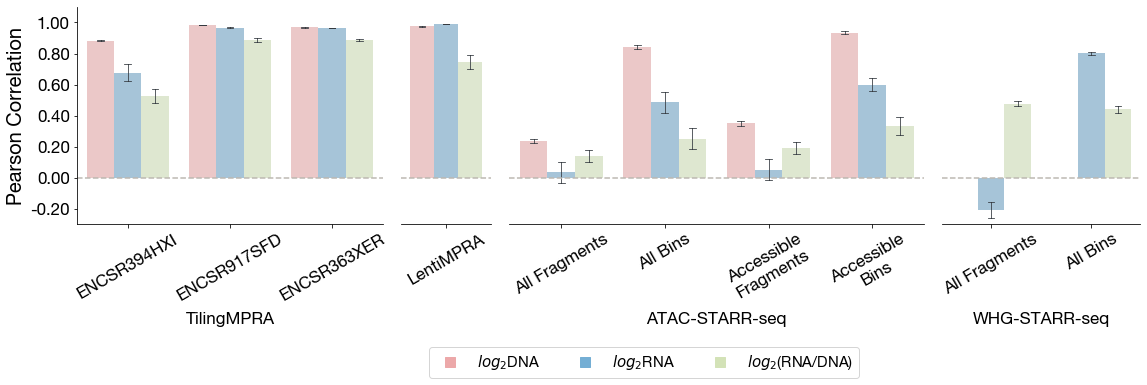

In [52]:
palette = {'DNA':'#eca8a9', 'RNA':'#74aed4', 'Ratio':'#d3e2b7'}
x='Dataset'
y='Pearson_r'
hue = 'annot'
hue_order=['DNA', 'RNA', 'Ratio']
ylabel = 'Pearson Correlation'
fig = plt.figure(figsize=(21,4))
ax = plt.subplot2grid((1,11), (0,0))
plt.subplots_adjust(wspace=0.2)

ax1 = plt.subplot2grid((1,11), (0,0), colspan=3)
x_order_list = ['TilingMPRA\n(ENCSR394HXI)', 'TilingMPRA\n(ENCSR917SFD)', 'TilingMPRA\n(ENCSR363XER)']
xtick_list = ['ENCSR394HXI', 'ENCSR917SFD', 'ENCSR363XER']
dataset_label ='TilingMPRA'
ax1 = barplot_subplot(ax=ax1, data=tiling_data, x=x, y=y, 
                      hue=hue, hue_order=hue_order, x_order=x_order_list, palette=palette, 
                      dataset_label=dataset_label, ylabel=ylabel, 
                      xticklabel=xtick_list, legend=False, hide_yaxis=False)

ax2 = plt.subplot2grid((1,11), (0,3), colspan=1, sharey=ax1)
x_order_list = ['LentiMPRA']
xtick_list = ['LentiMPRA']
dataset_label = 'LentiMPRA'
ax2 = barplot_subplot(ax=ax2, data=lenti_data, x=x, y=y, 
                      hue=hue, hue_order=hue_order, x_order=x_order_list, palette=palette, 
                      dataset_label=dataset_label, ylabel=ylabel, 
                      xticklabel=xtick_list, legend=False, hide_yaxis=True)


ax4 = plt.subplot2grid((1,11), (0,4), colspan=4, sharey=ax1)
x_order_list = ['All Fragments', 'All Bins', 'Accessible\nFragments', 'Accessible\nBins']
xtick_list = ['All Fragments', 'All Bins', 'Accessible\nFragments', 'Accessible\nBins']
dataset_label = 'ATAC-STARR-seq'
ax4 = barplot_subplot(ax=ax4, data=atac_data, x=x, y=y, 
                      hue=hue, hue_order=hue_order, x_order=x_order_list, palette=palette, 
                      dataset_label=dataset_label, ylabel=ylabel, 
                      xticklabel=xtick_list, legend=False, hide_yaxis=True)

ax5 = plt.subplot2grid((1,11), (0,8), colspan=2, sharey=ax1)
x_order_list = ['All Fragments', 'All Bins']
xtick_list = ['All Fragments', 'All Bins']
dataset_label = 'WHG-STARR-seq'
ax5 = barplot_subplot(ax=ax5, data=whg_data, x=x, y=y, 
                      hue=hue, hue_order=hue_order, x_order=x_order_list, palette=palette, 
                      dataset_label=dataset_label, ylabel=ylabel, 
                      xticklabel=xtick_list, legend=False, hide_yaxis=True)

c_list = ['#eca8a9', '#74aed4', '#d3e2b7']
k_list = ['$log_2$DNA', '$log_2$RNA', '$log_2$(RNA/DNA)']

patches = [ plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=c_list[i], 
                 label="{:s}".format(k_list[i]) )[0]  for i in range(len(c_list)) ]

fig.legend(handles = patches, bbox_to_anchor=(0.5, -0.3), loc='upper center', 
       fancybox=True, ncol=3, borderaxespad=0., fontsize=15)

out_path = ''
if(out_path != ''):
    plt.savefig(out_path, bbox_inches='tight', transparent=True, dpi=300)
    
    